In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [3]:
# def read_dataset():
df = pd.read_csv('sonar.csv', header = None)
print(len(df.columns))
X = df[df.columns[0:60]].values
y = df[df.columns[60]]

61


In [4]:
X

array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]])

In [5]:
print(X.shape)
print(X.shape[1])
print(X.shape[0])

(208, 60)
60
208


In [6]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

In [7]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
type(y)

numpy.ndarray

In [8]:
n_labels = len(y)
n_unique_labels = len(np.unique(y))
one_hot_encode = np.zeros((n_labels, n_unique_labels))
one_hot_encode[np.arange(n_labels), y] = 1
Y = one_hot_encode

In [10]:
Y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [11]:
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
normalized_features = (X - mu)/sigma

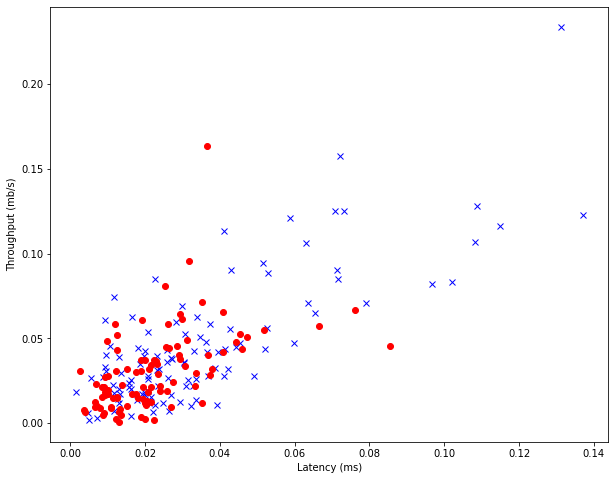

In [14]:
normal = np.where(y==0)
outliers = np.where(y==1)
fig = plt.figure(figsize=(10,8))
plt.plot(X[normal, 0], X[normal, 1], 'bx')
plt.plot(X[outliers, 0], X[outliers, 1], 'ro')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.show()

In [15]:
X,Y = shuffle(X,Y,random_state=1)
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.20, random_state=42)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(166, 60)
(166, 2)
(42, 60)
(42, 2)


In [16]:
learning_rate = 0.1
training_epochs = 1000
cost_history = np.empty(shape=[1], dtype=float)

n_dim = X.shape[1]
n_class = 2

In [23]:
x = tf.placeholder(tf.float32,[None,n_dim])
W = tf.Variable(tf.zeros([n_dim,n_class]))
b = tf.Variable(tf.zeros([n_class]))


Instructions for updating:
Colocations handled automatically by placer.


In [27]:
b.shape

TensorShape([Dimension(2)])

In [36]:
init = tf.global_variables_initializer()

In [1]:
y_ = tf.placeholder(tf.float32, [None, n_class])
y = tf.nn.softmax(tf.matmul(x, W) + b)
cost_function = tf.reduce_mean(-tf.reduce_sum((y_ * tf.log(y)), reduction_indices=[1]))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

NameError: name 'tf' is not defined

In [38]:
sess = tf.Session()
sess.run(init)
mse_history = []

In [40]:
for epoch in range( training_epochs):
    sess.run(training_step, feed_dict={x:train_x, y_:train_y})
    cost = sess.run(cost_function, feed_dict={x:train_x, y_:train_y})
    cost_history = np.append(cost_history, cost)
    pred_y = sess.run(y, feed_dict={x:test_x})
    print('epoch : ', epoch, ' - ', 'cost : ', cost)
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_history.append(sess.run(mse))

epoch :  0  -  cost :  0.6843908
epoch :  1  -  cost :  0.6818702
epoch :  2  -  cost :  0.67961293
epoch :  3  -  cost :  0.67747086
epoch :  4  -  cost :  0.67539614
epoch :  5  -  cost :  0.67337245
epoch :  6  -  cost :  0.67139345
epoch :  7  -  cost :  0.669456
epoch :  8  -  cost :  0.6675579
epoch :  9  -  cost :  0.6656975
epoch :  10  -  cost :  0.66387314
epoch :  11  -  cost :  0.66208357
epoch :  12  -  cost :  0.6603273
epoch :  13  -  cost :  0.6586031
epoch :  14  -  cost :  0.65690964
epoch :  15  -  cost :  0.65524596
epoch :  16  -  cost :  0.65361094
epoch :  17  -  cost :  0.6520033
epoch :  18  -  cost :  0.6504222
epoch :  19  -  cost :  0.6488668
epoch :  20  -  cost :  0.647336
epoch :  21  -  cost :  0.64582914
epoch :  22  -  cost :  0.64434534
epoch :  23  -  cost :  0.64288366
epoch :  24  -  cost :  0.64144367
epoch :  25  -  cost :  0.6400244
epoch :  26  -  cost :  0.6386254
epoch :  27  -  cost :  0.6372459
epoch :  28  -  cost :  0.6358853
epoch :  29 

epoch :  240  -  cost :  0.50372267
epoch :  241  -  cost :  0.5034185
epoch :  242  -  cost :  0.5031157
epoch :  243  -  cost :  0.5028144
epoch :  244  -  cost :  0.50251436
epoch :  245  -  cost :  0.50221586
epoch :  246  -  cost :  0.50191855
epoch :  247  -  cost :  0.5016226
epoch :  248  -  cost :  0.5013282
epoch :  249  -  cost :  0.5010349
epoch :  250  -  cost :  0.50074303
epoch :  251  -  cost :  0.5004524
epoch :  252  -  cost :  0.5001631
epoch :  253  -  cost :  0.49987507
epoch :  254  -  cost :  0.49958837
epoch :  255  -  cost :  0.49930292
epoch :  256  -  cost :  0.49901876
epoch :  257  -  cost :  0.4987358
epoch :  258  -  cost :  0.4984541
epoch :  259  -  cost :  0.49817362
epoch :  260  -  cost :  0.49789447
epoch :  261  -  cost :  0.49761638
epoch :  262  -  cost :  0.4973396
epoch :  263  -  cost :  0.49706396
epoch :  264  -  cost :  0.49678957
epoch :  265  -  cost :  0.49651635
epoch :  266  -  cost :  0.4962443
epoch :  267  -  cost :  0.49597344
epoc

epoch :  471  -  cost :  0.457116
epoch :  472  -  cost :  0.4569796
epoch :  473  -  cost :  0.45684355
epoch :  474  -  cost :  0.45670786
epoch :  475  -  cost :  0.45657253
epoch :  476  -  cost :  0.4564376
epoch :  477  -  cost :  0.4563029
epoch :  478  -  cost :  0.45616868
epoch :  479  -  cost :  0.45603475
epoch :  480  -  cost :  0.45590118
epoch :  481  -  cost :  0.4557679
epoch :  482  -  cost :  0.455635
epoch :  483  -  cost :  0.45550242
epoch :  484  -  cost :  0.4553702
epoch :  485  -  cost :  0.45523834
epoch :  486  -  cost :  0.4551068
epoch :  487  -  cost :  0.45497558
epoch :  488  -  cost :  0.45484468
epoch :  489  -  cost :  0.45471412
epoch :  490  -  cost :  0.45458397
epoch :  491  -  cost :  0.45445397
epoch :  492  -  cost :  0.45432448
epoch :  493  -  cost :  0.45419523
epoch :  494  -  cost :  0.45406628
epoch :  495  -  cost :  0.45393768
epoch :  496  -  cost :  0.45380935
epoch :  497  -  cost :  0.45368144
epoch :  498  -  cost :  0.45355377
ep

epoch :  703  -  cost :  0.43250993
epoch :  704  -  cost :  0.43242645
epoch :  705  -  cost :  0.43234318
epoch :  706  -  cost :  0.43225998
epoch :  707  -  cost :  0.43217695
epoch :  708  -  cost :  0.43209407
epoch :  709  -  cost :  0.43201125
epoch :  710  -  cost :  0.43192866
epoch :  711  -  cost :  0.43184617
epoch :  712  -  cost :  0.43176386
epoch :  713  -  cost :  0.43168166
epoch :  714  -  cost :  0.43159962
epoch :  715  -  cost :  0.4315177
epoch :  716  -  cost :  0.43143588
epoch :  717  -  cost :  0.43135425
epoch :  718  -  cost :  0.43127275
epoch :  719  -  cost :  0.4311914
epoch :  720  -  cost :  0.4311102
epoch :  721  -  cost :  0.4310291
epoch :  722  -  cost :  0.43094814
epoch :  723  -  cost :  0.43086728
epoch :  724  -  cost :  0.43078664
epoch :  725  -  cost :  0.4307061
epoch :  726  -  cost :  0.43062574
epoch :  727  -  cost :  0.4305454
epoch :  728  -  cost :  0.4304652
epoch :  729  -  cost :  0.43038523
epoch :  730  -  cost :  0.43030533

epoch :  935  -  cost :  0.41623357
epoch :  936  -  cost :  0.41617423
epoch :  937  -  cost :  0.41611496
epoch :  938  -  cost :  0.41605574
epoch :  939  -  cost :  0.4159966
epoch :  940  -  cost :  0.41593757
epoch :  941  -  cost :  0.41587856
epoch :  942  -  cost :  0.41581964
epoch :  943  -  cost :  0.41576082
epoch :  944  -  cost :  0.41570204
epoch :  945  -  cost :  0.4156434
epoch :  946  -  cost :  0.41558474
epoch :  947  -  cost :  0.41552624
epoch :  948  -  cost :  0.41546774
epoch :  949  -  cost :  0.41540933
epoch :  950  -  cost :  0.41535103
epoch :  951  -  cost :  0.4152927
epoch :  952  -  cost :  0.41523457
epoch :  953  -  cost :  0.41517645
epoch :  954  -  cost :  0.41511843
epoch :  955  -  cost :  0.41506043
epoch :  956  -  cost :  0.41500258
epoch :  957  -  cost :  0.4149447
epoch :  958  -  cost :  0.41488698
epoch :  959  -  cost :  0.4148293
epoch :  960  -  cost :  0.41477168
epoch :  961  -  cost :  0.41471416
epoch :  962  -  cost :  0.414656

MSE :  [0.24712377790415488, 0.246313684083883, 0.2455365166539686, 0.24475775995877475, 0.2439765685154439, 0.24319808204316976, 0.24242679575838189, 0.2416655743458218, 0.2409159844940251, 0.24017873850895816, 0.2394540478737139, 0.2387418273835541, 0.2380418386819047, 0.23735376667785285, 0.23667725029760883, 0.23601192297841514, 0.23535741983887204, 0.2347133731632843, 0.23407944431657923, 0.23345529433352236, 0.23284060273913115, 0.2322350615371338, 0.23163838433354123, 0.23105028902540667, 0.23047050847342934, 0.22989879489510917, 0.2293349045813914, 0.22877860100765965, 0.2282296727018331, 0.2276879112332916, 0.22715310764055469, 0.22662507819689348, 0.22610363861018148, 0.22558861900116622, 0.22507984501854697, 0.22457716376487055, 0.2240804219300726, 0.22358947174734198, 0.22310417391669363, 0.22262439900987493, 0.22215001376233978, 0.22168090143484015, 0.22121694308142756, 0.22075802194166586, 0.2203040330544106, 0.2198548728473106, 0.2194104418698553, 0.21897063885267573, 0.

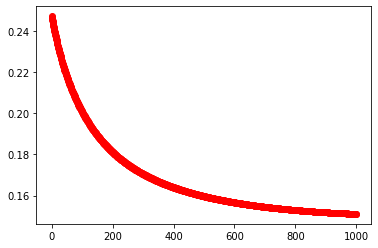

In [41]:
print("MSE : ", mse_history)
plt.plot(mse_history, 'ro-')
plt.show()

In [42]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_:test_y})))

Accuracy:  0.8095238


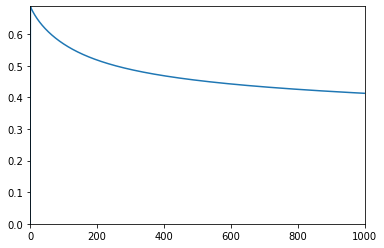

In [43]:
plt.plot(range(len(cost_history)), cost_history)
plt.axis([0, training_epochs, 0, np.max(cost_history)])
plt.show()

In [44]:
pred_y

array([[0.06778993, 0.9322101 ],
       [0.63951075, 0.36048928],
       [0.2605322 , 0.7394678 ],
       [0.19142108, 0.80857885],
       [0.68848985, 0.31151012],
       [0.09516971, 0.9048303 ],
       [0.9910108 , 0.00898918],
       [0.09973089, 0.90026903],
       [0.6808636 , 0.31913638],
       [0.512914  , 0.48708603],
       [0.97668034, 0.02331964],
       [0.5895445 , 0.4104555 ],
       [0.4783664 , 0.5216336 ],
       [0.8948265 , 0.10517353],
       [0.7461159 , 0.2538841 ],
       [0.24364954, 0.75635046],
       [0.5466063 , 0.4533938 ],
       [0.5096499 , 0.49035007],
       [0.6773989 , 0.3226011 ],
       [0.66458285, 0.33541715],
       [0.45032102, 0.54967904],
       [0.540045  , 0.459955  ],
       [0.20675981, 0.7932402 ],
       [0.45299944, 0.5470005 ],
       [0.50996804, 0.49003196],
       [0.9775479 , 0.02245217],
       [0.84863436, 0.15136568],
       [0.16863857, 0.8313614 ],
       [0.70883805, 0.2911619 ],
       [0.4308369 , 0.56916314],
       [0.

In [48]:
test_y

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])